In [181]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
print(torch.__version__)

1.11.0+cu115


In [182]:
# 先生成数据, 5个变量的线性回归
# y = 1.23x1 + 2.34x2 - 3.45x3 - 4.56x4 + 5.67x5 - 6.78
num_inputs = 5
N = 3000
true_w = torch.tensor([1.23, 2.34, -3.45, -4.56, 5.67]).reshape(num_inputs, -1)
true_b = -6.78
features = torch.rand(size=(N, num_inputs)) * 10; # torch.rand()默认0-1
labels = torch.matmul(features, true_w) + true_b
noise = torch.normal(size=labels.size(), mean=0, std=0.05)

In [183]:
features.size(), labels.size()

(torch.Size([3000, 5]), torch.Size([3000, 1]))

In [184]:
features

tensor([[0.2869, 6.8107, 3.7592, 7.5409, 0.9139],
        [6.8040, 5.7026, 2.4012, 7.3559, 8.2796],
        [1.1165, 8.7937, 3.6950, 9.5280, 5.0437],
        ...,
        [1.6822, 5.6170, 2.8728, 6.4597, 4.0828],
        [5.7763, 0.3853, 0.3715, 4.3181, 1.7823],
        [0.7154, 4.6646, 6.3367, 6.6765, 5.9124]])

In [185]:
labels

tensor([[-32.6642],
        [ 20.0514],
        [-12.4271],
        ...,
        [ -7.7847],
        [ -9.6400],
        [-13.7678]])

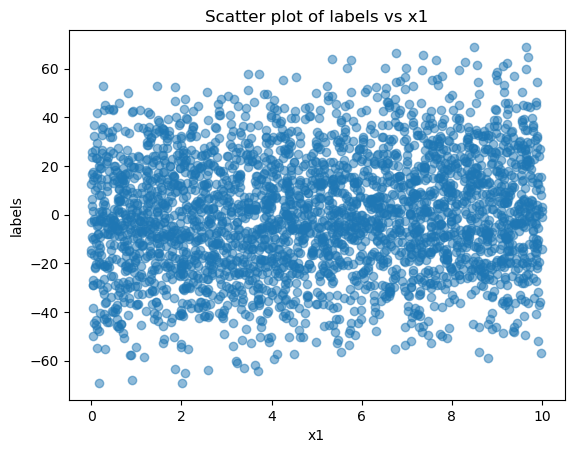

In [186]:
plt.scatter(features[:, 0].flatten(), labels, alpha=0.5)
plt.title('Scatter plot of labels vs x1')
plt.xlabel('x1')
plt.ylabel('labels')
plt.show()

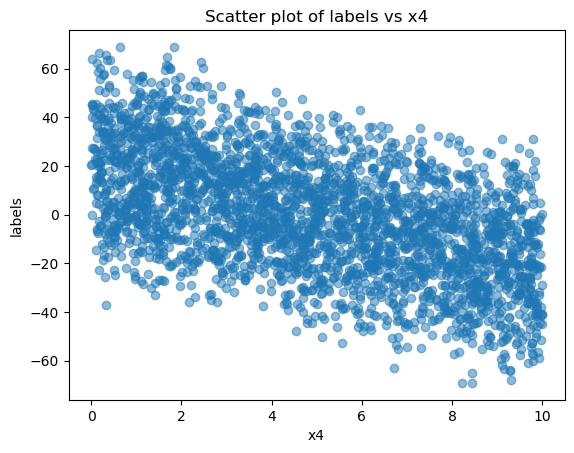

In [187]:
plt.scatter(features[:, 3].flatten(), labels, alpha=0.5)
plt.title('Scatter plot of labels vs x4')
plt.xlabel('x4')
plt.ylabel('labels')
plt.show()

In [188]:
def net(X, w, b):
    return torch.matmul(X, w) + b

In [189]:
# 为什么不除以样本数量了？
def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 # / len(y_hat)?

In [190]:
def data_iter(batch_size, features, labels):
    N = len(features)
    indices = list(range(N))
    random.shuffle(indices)
    for i in range(0, N, batch_size):
        # min的作用是防止切片越界, 因为最后一次迭代不一定够一个batch
        select = torch.LongTensor(indices[i: min(i + batch_size, N)])
        # yield是迭代器关键字
        yield features.index_select(0, select), labels.index_select(0, select)

In [191]:
for X, y in data_iter(5, features, labels):
    print(X.shape, '\n', y.shape)
    break

torch.Size([5, 5]) 
 torch.Size([5, 1])


In [192]:
# 初始化网络参数
net_w = torch.normal(mean=0, std=0.5, size=true_w.shape).requires_grad_(requires_grad=True)
net_b = torch.normal(mean=0, std=0.5, size=(1, 1)).requires_grad_(requires_grad=True)
net_w, net_b

(tensor([[-0.3019],
         [ 0.5361],
         [ 0.5607],
         [ 0.3920],
         [ 0.3327]], requires_grad=True),
 tensor([[-0.1583]], requires_grad=True))

In [193]:
# 尝试一下一个变量的预测和loss
test_x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
test_y = torch.matmul(test_x, true_w) + true_b

test_y_hat = net(test_x, net_w, net_b)
test_y_hat, loss(test_y_hat, test_y)

(tensor([[5.5255]], grad_fn=<AddBackward0>),
 tensor([[22.0149]], grad_fn=<DivBackward0>))

In [194]:
# 尝试一下一个batch的预测和loss
for X, y in data_iter(5, features, labels):
    print(loss(net(X, net_w, net_b), y))
    break

tensor([[  82.1079],
        [ 764.6035],
        [ 169.1709],
        [ 100.9827],
        [1036.6974]], grad_fn=<DivBackward0>)


In [195]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # /batch_size是在干嘛?

In [196]:
lr = 0.003
num_epochs = 50
batch_size = 500

for epoch in range (num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, net_w, net_b)
        l = loss(y_hat, y).sum()
        l.backward()
        sgd([net_w, net_b], lr, batch_size)

        # 梯度清零
        net_w.grad.data.zero_()
        net_b.grad.data.zero_()
    train_l = loss(net(features, net_w, net_b), labels)
    print('epoch %d: loss %f' %(epoch + 1, train_l.mean().item()))

epoch 1: loss 226.981400
epoch 2: loss 168.879166
epoch 3: loss 125.751472
epoch 4: loss 93.676003
epoch 5: loss 69.903366
epoch 6: loss 52.272877
epoch 7: loss 39.156029
epoch 8: loss 29.426258
epoch 9: loss 22.196192
epoch 10: loss 16.830732
epoch 11: loss 12.845521
epoch 12: loss 9.886346
epoch 13: loss 7.677123
epoch 14: loss 6.047087
epoch 15: loss 4.824216
epoch 16: loss 3.919453
epoch 17: loss 3.247079
epoch 18: loss 2.747686
epoch 19: loss 2.374320
epoch 20: loss 2.096159
epoch 21: loss 1.889197
epoch 22: loss 1.734824
epoch 23: loss 1.619085
epoch 24: loss 1.532670
epoch 25: loss 1.467029
epoch 26: loss 1.417859
epoch 27: loss 1.380669
epoch 28: loss 1.352506
epoch 29: loss 1.330206
epoch 30: loss 1.313478
epoch 31: loss 1.299784
epoch 32: loss 1.289557
epoch 33: loss 1.280391
epoch 34: loss 1.273520
epoch 35: loss 1.267201
epoch 36: loss 1.262010
epoch 37: loss 1.257354
epoch 38: loss 1.253247
epoch 39: loss 1.249461
epoch 40: loss 1.247549
epoch 41: loss 1.242612
epoch 42: l

In [197]:
net_w, true_w

(tensor([[ 0.9936],
         [ 2.0916],
         [-3.6823],
         [-4.7791],
         [ 5.4241]], requires_grad=True),
 tensor([[ 1.2300],
         [ 2.3400],
         [-3.4500],
         [-4.5600],
         [ 5.6700]]))

(tensor([[-0.5548]], requires_grad=True), -6.78)